# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


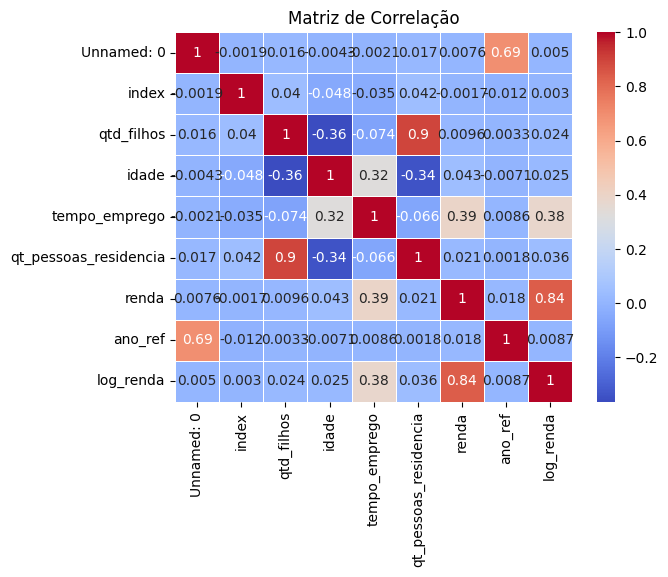

In [42]:
#1
# Remover colunas booleanas
df_limpo = df.select_dtypes(exclude=['bool'])

# Selecionar apenas as características numéricas
caracteristicas_numericas = df_limpo.select_dtypes(include=['number'])

# Calcular a correlação apenas para características numéricas
df_corr = caracteristicas_numericas.corr()

# Visualizar a matriz de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

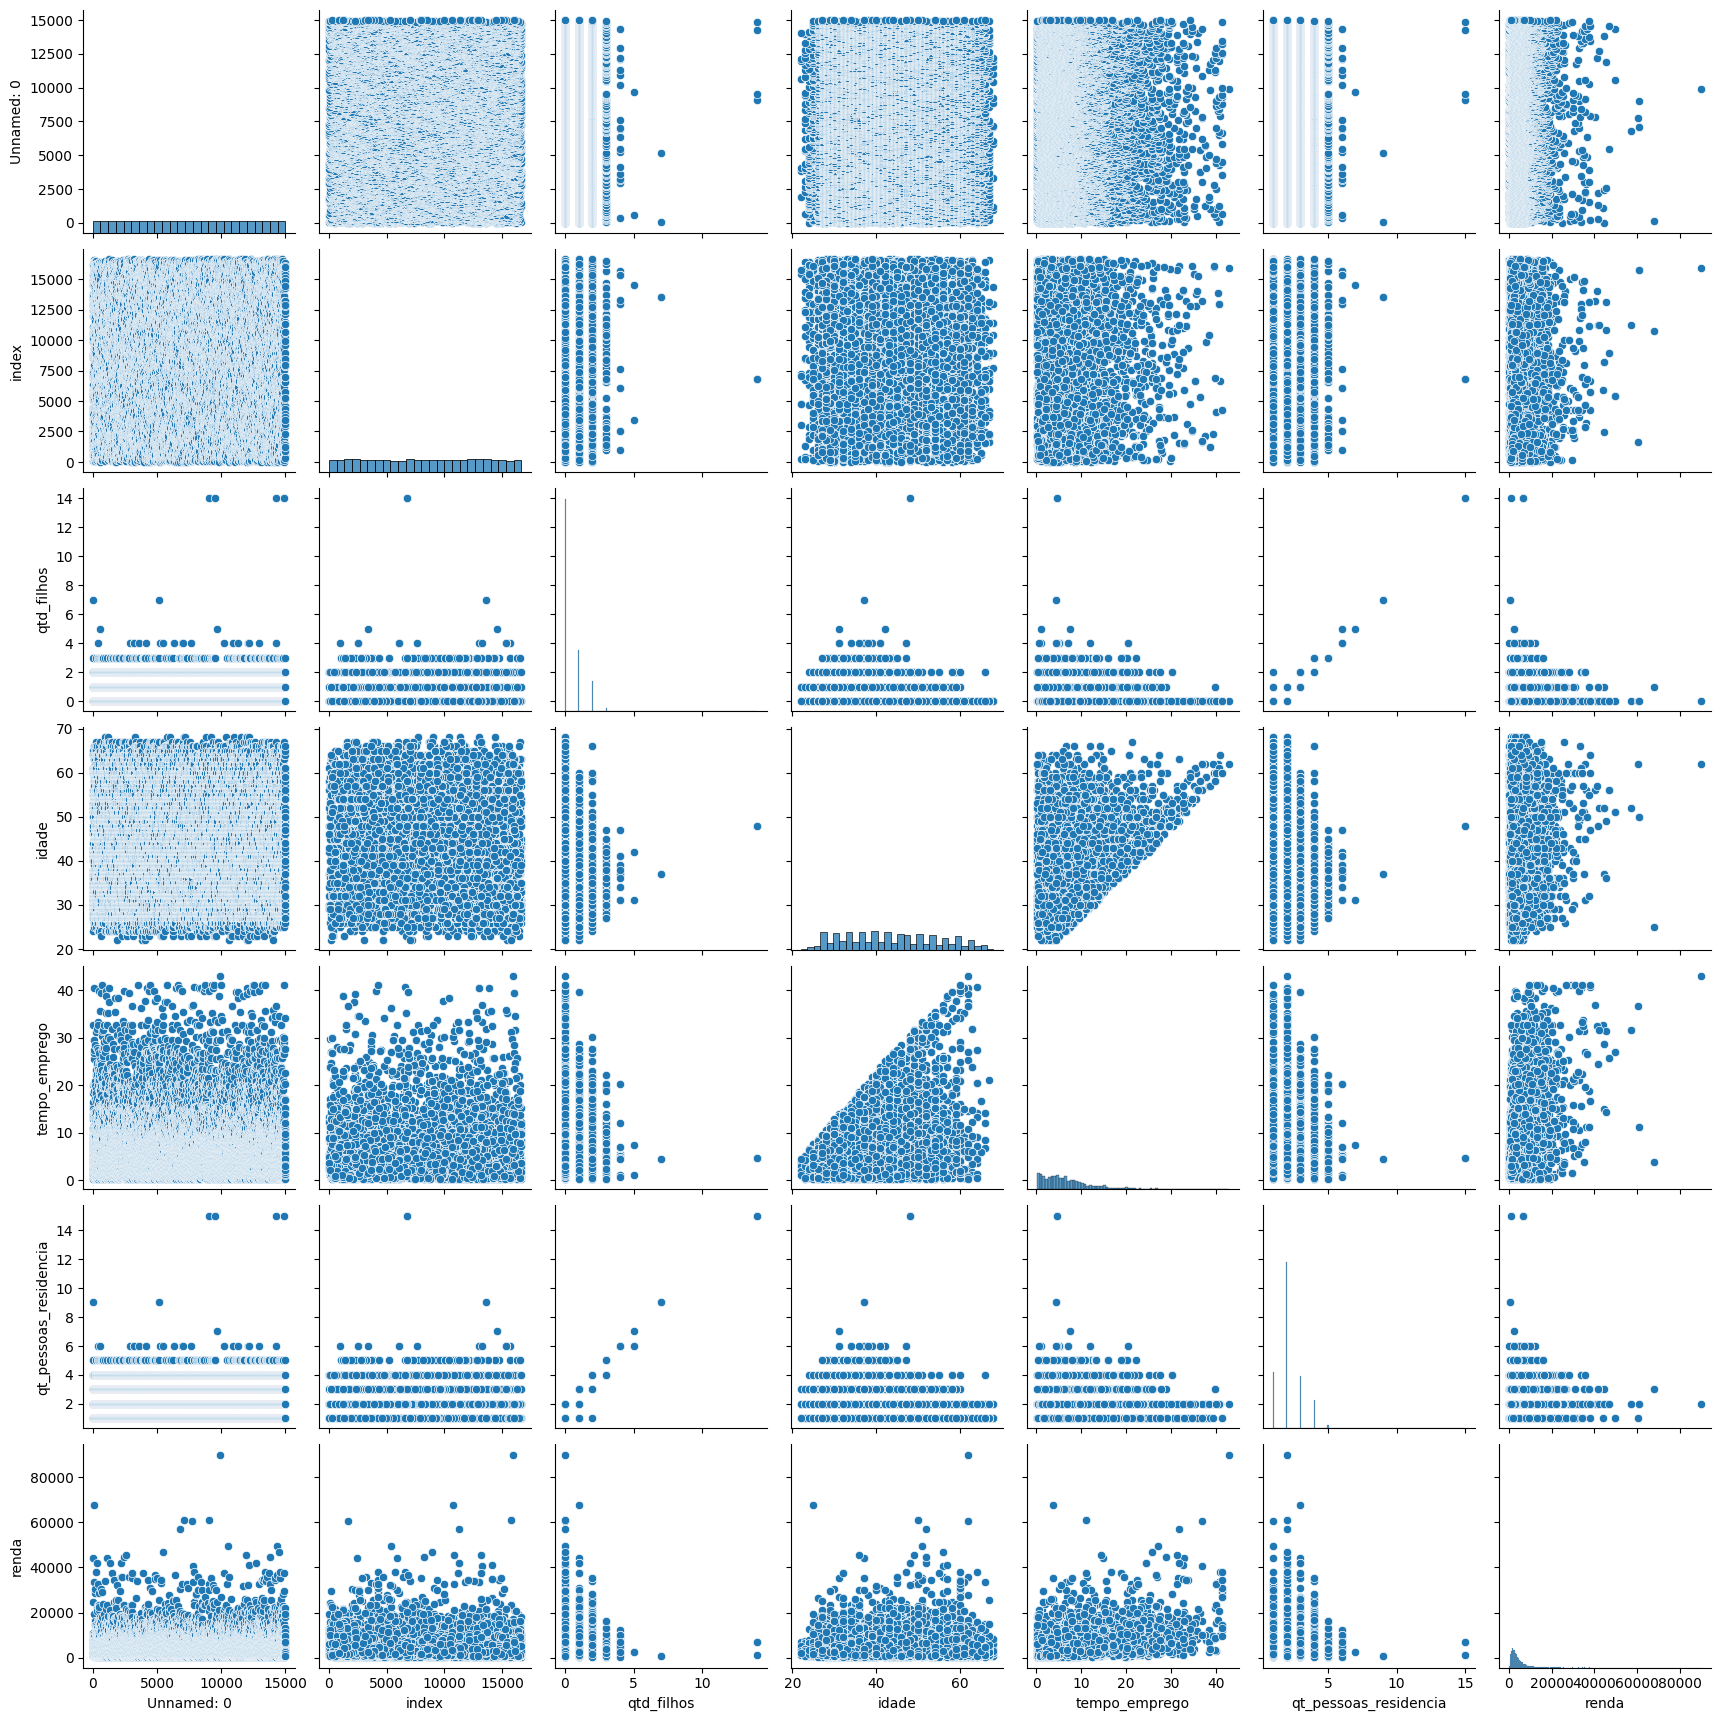

In [43]:
#1 Grafico de dispersão
df_limpo = df.select_dtypes(exclude=['bool'])
caracteristicas_numericas = df_limpo.select_dtypes(include=['number'])
sns.pairplot(caracteristicas_numericas)
plt.show()

Embora a vizualização mesmo após a limpeza das colunas esteja complexa, nota-se um padrão no quesito renda e tempo de emprego. Quanto maior o tempo dos clientes empregados, maior está a renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

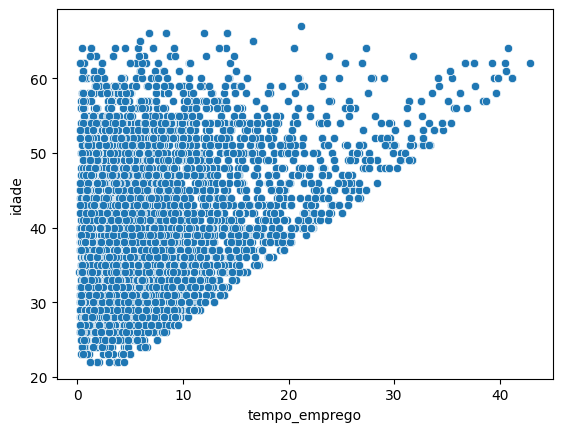

In [44]:
#2
sns.scatterplot(data=df, x = 'tempo_emprego', y = 'idade')
plt.show()

3) Na su aopinião, há outliers na variável renda?

Sim, uma vez que há alguém que tem uma renda muito alta em um raw que não está na média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [45]:
#4
log_renda = np.log(df['renda'])
df['log_renda'] = log_renda


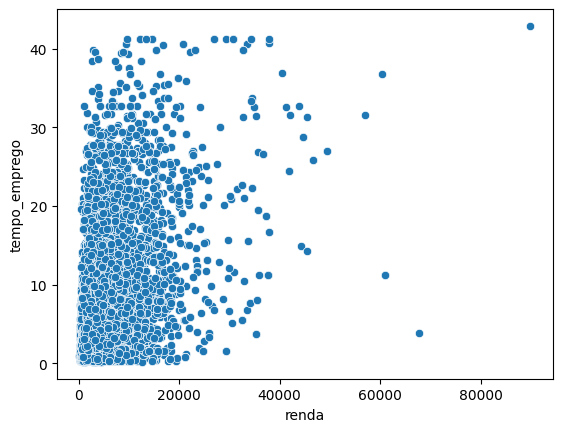

In [46]:
#semLog
sns.scatterplot(data=df, x = 'renda', y = 'tempo_emprego')
plt.show()

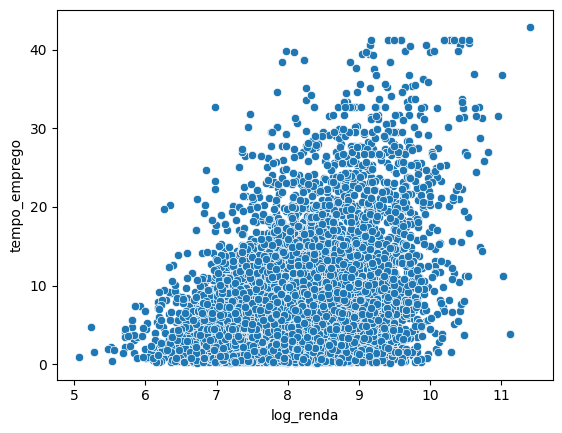

In [47]:
#4
sns.scatterplot(data=df, x = 'log_renda', y = 'tempo_emprego')
plt.show()

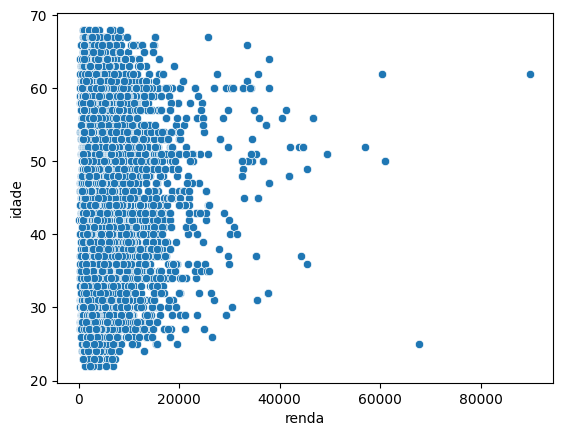

In [48]:
#semLog
sns.scatterplot(data=df, x = 'renda', y = 'idade')
plt.show()

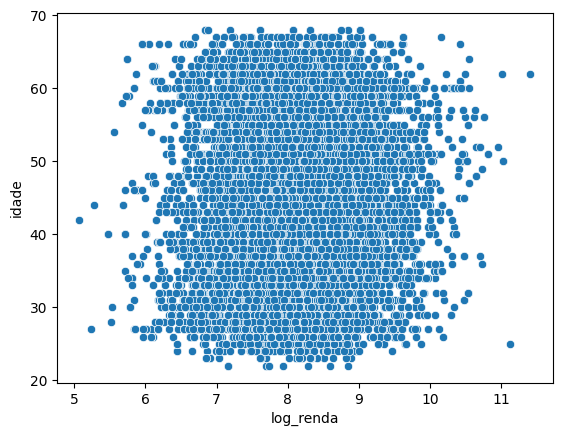

In [49]:
sns.scatterplot(data=df, x = 'log_renda', y = 'idade')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Pode-se observar que a aplicação da função logaritmo torna os dados mais consistentes para análise do que sem o uso dela. A precisão da relação das variávéis está mais visível e firme. Visualmente se nota a correlação das colunas.